# Week1 (Wuwei Zhang)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

def load_dataset():
    mndata = MNIST('C:/Users/Zhang/python-mnist/data')
    A_train, labels_train = map(np.array, mndata.load_training()) 
    A_test, labels_test = map(np.array, mndata.load_testing()) 
    A_train = A_train/255.0
    A_test = A_test/255.0
    
    return A_train, A_test, labels_train, labels_test

A_train, A_test, labels_train, labels_test = load_dataset()


# one-hot codes labels
B_labels_train = np.zeros((60000, 10))
for i in range(len(labels_train)):
    B_labels_train[i, labels_train[i]] = 1
B_labels_test = np.zeros((10000, 10))
for j in range(len(labels_test)):
    B_labels_test[j, labels_test[j]] = 1

Q: This is a solving Over-determined system probelm?

## Use pinv

0.8533999999999999


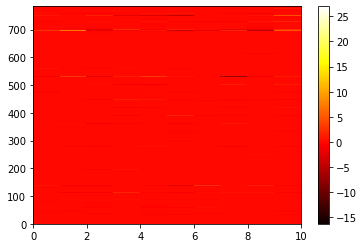

In [4]:
# Use pinv
    
A_inverse = np.linalg.pinv(A_train)
X_solution = np.matmul(A_inverse, B_labels_train)
B_test_predicted = np.matmul(A_test, X_solution)
labels_test_predicted = np.argmax(B_test_predicted, axis = 1)

accuracy = 1-np.count_nonzero(labels_test - labels_test_predicted)/10000
plt.figure()
plt.pcolor(X_solution, cmap = 'hot')
plt.colorbar()

print(accuracy)

## Use Lasso

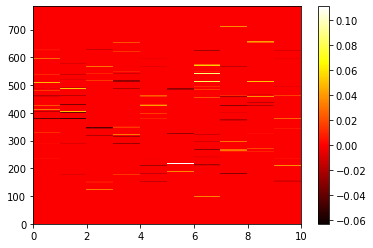

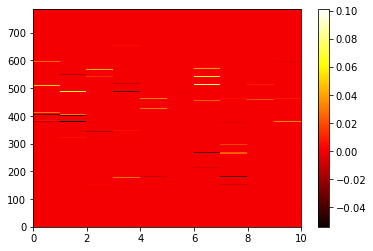

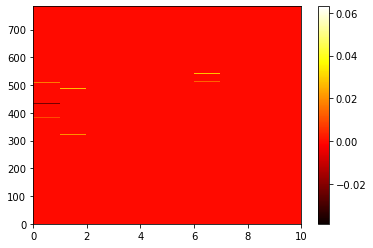

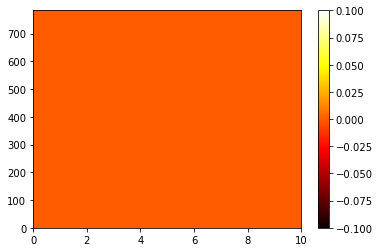

In [3]:
# Use Lasso

from sklearn import linear_model
lam = [0.01, 0.02, 0.04, 0.08]
accuracy = np.zeros(4)

for i in range(len(lam)):
    clf = linear_model.Lasso(alpha=lam[i])
    clf.fit(A_train, B_labels_train)
    X = clf.coef_.T
    B_test_predicted = np.matmul(A_test, clf.coef_.T)
    labels_test_predicted = np.argmax(B_test_predicted, axis = 1)
    accuracy[i] = 1-np.count_nonzero(labels_test - labels_test_predicted)/10000
    plt.figure()
    plt.pcolor(X, cmap = 'hot')
    plt.colorbar() 

[0.7426, 0.65, 0.2648, 0.098], accuracy decreases with increasing $\lambda$
1. Why it would cause probelm when using $\lambda$ = 0?
2. Why the values of solution X using pinv have less fluctuation than those
   of solutions X using Lasso with $\lambda$ = 0.01, 0.02?
3. What does clf stands for?  

## Use Ridge

[0.8117 0.8117 0.8117 0.8117]


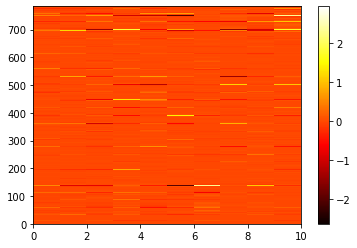

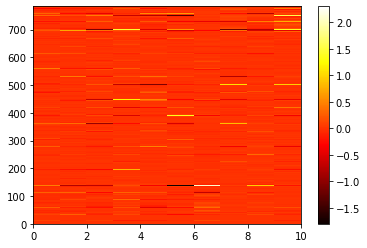

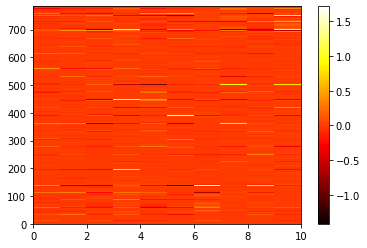

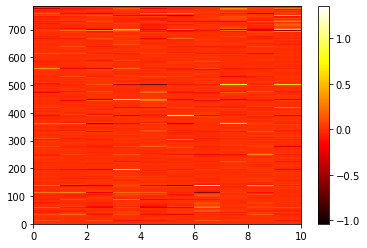

In [5]:
# Use Ridge

from sklearn.linear_model import Ridge
lam = [0.01, 0.02, 0.04, 0.08]
accuracy = np.zeros(4)

for i in range(len(lam)):
    clf = Ridge(alpha=lam[i])
    clf.fit(A_train, B_labels_train)
    X = clf.coef_.T
    B_test_predicted = np.matmul(A_test, clf.coef_.T)
    labels_test_predicted = np.argmax(B_test_predicted, axis = 1)
    accuracy[i] = 1-np.count_nonzero(labels_test - labels_test_predicted)/10000
    plt.figure()
    plt.pcolor(X, cmap = 'hot')
    plt.colorbar()

print(accuracy)

accuracy remains the same for different values of lambda (why?)
I forget how $l_2$ norms would affect our solution X....

## Use ElasticNet

[[0.7409 0.7405 0.739 ]
 [0.6506 0.6529 0.6569]
 [0.2642 0.2638 0.2623]]


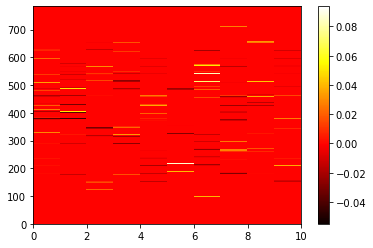

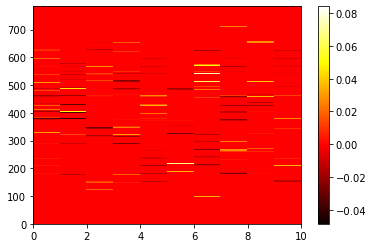

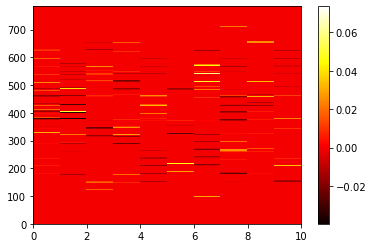

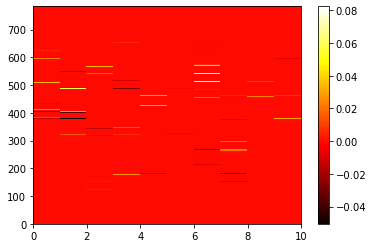

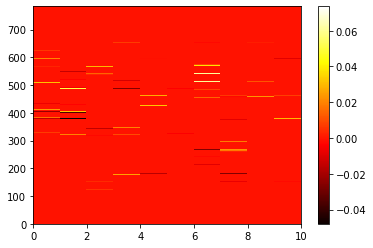

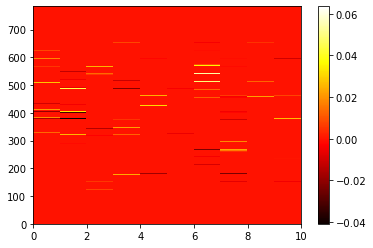

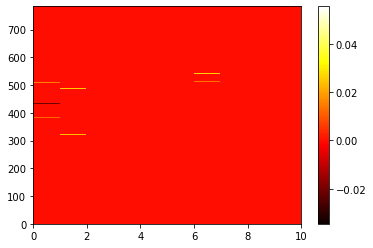

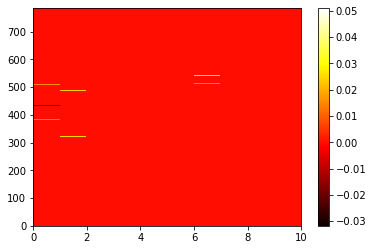

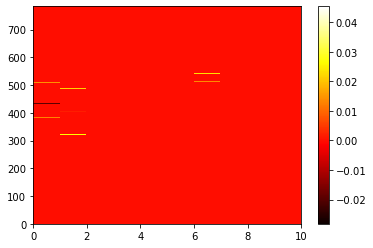

In [6]:
# Use ElasticNet

from sklearn.linear_model import ElasticNet
lam1 = [0.01, 0.02, 0.04]
lam2 = [0.01, 0.02, 0.04]
accuracy = np.zeros((3, 3))

for i in range(len(lam1)):
    for j in range(len(lam2)):
        clf = ElasticNet(alpha=lam1[i]+lam2[j], l1_ratio = lam1[i]/(lam1[i]+lam2[j]))
        clf.fit(A_train, B_labels_train)
        X = clf.coef_.T
        B_test_predicted = np.matmul(A_test, clf.coef_.T)
        labels_test_predicted = np.argmax(B_test_predicted, axis = 1)
        accuracy[i,j] = 1-np.count_nonzero(labels_test - labels_test_predicted)/10000
        plt.figure()
        plt.pcolor(X, cmap = 'hot')
        plt.colorbar()

print(accuracy)

increasing penalization of $l_2$ norms doesn't affect prediction and accuracy?

## Summary

0. We are solving an over-determined system probelm.


1. $\lambda_1$ = 0, $\lambda_2$ = 0 give the best prediction with accuracy 0.8533999999999999.


2. Lasson Regression

    1) When $\lambda_2$ = 0, using Lasso regression, accuracy decreases as $\lambda_1$ increases.      (why???)
   
    2) Remaining Questions
   
    Why it would cause probelm when using $\lambda_1$ = 0?
   
    Why the values of solution X using pinv have less fluctuation than those in solution X using Lasso with $\lambda_1$ = 0.01, 0.02
      
    What does clf stands for? 
      
      
3. Ridge Regression

    1) Accuracy remains the same for different values of lambda.  (why???)
    
    2) Remaining Questions
    
    I forget how $l_2$ norms would affect our solution X... :(
    
 
4. ElasticNet

    1) Increasing penalization of $l_2$ norms doesn't affect prediction and accuracy. $l_1$ norms are more important.   (why???)